# Lab - Reading MNIST Data

*Last Updated: August 7, 2017*

* **Prerequisite:** [Jupyter Notebook](http://realai.org/course/jupyter/) running on a [Python 3](http://realai.org/course/python/) kernel with packages [NumPy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/). An installation of Jupyter on [Google Compute Engine](http://realai.org/course/GCE/) following [these steps](http://realai.org/course/GCE/jupyter/), including the optional steps at the end, satisfies these requirements.
* **Source:** [Download](http://realai.org/course/jupyter/reading-MNIST-data.ipynb) the `.ipynb` file or [view on GitHub](https://github.com/real-ai/realai.org/blob/master/course/jupyter/reading-MNIST-data.ipynb).

The [MNIST database of handwritten digits](http://yann.lecun.com/exdb/mnist/) is a popular database for basic machine learning exercises. It contains greyscale 28x28 images split into a training set of 60,000 examples and a test set of 10,000 examples. The training images are contained in a compressed file available at [http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz](http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz). To get this file, we need to access the Internet from Python, so we import the [urllib.request](https://docs.python.org/3/library/urllib.request.html) module, which is a component of the [Python Standard Library](https://docs.python.org/3/library/index.html):

In [1]:
import urllib.request

Use the function [urlopen](https://docs.python.org/3/library/urllib.request.html#urllib.request.urlopen) To open the URL:

In [2]:
tmp_HR = urllib.request.urlopen("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz")

Check our [http.client.HTTPResponse](https://docs.python.org/3/library/http.client.html#http.client.HTTPResponse) object to see if the request was successful:

In [3]:
print(tmp_HR.status, tmp_HR.reason)

200 OK


Let's [open](https://docs.python.org/3.5/library/functions.html#open) a temporary file to store the data locally. `w+b` here means opening a disk file (`+`) for writing (`w`) in binary (`b`) mode:

In [4]:
f = open("tmp_MNIST_train_images.gz", "w+b")

Read data from our online request and write it to the file:

In [5]:
f.write(tmp_HR.read())
f.close()

We should have a file named "tmp_MNIST_train_images.gz" in our home directory, Use the [subprocess](https://docs.python.org/3.5/library/subprocess.html) module to call shell command `ls` and [check_output](https://docs.python.org/3.5/library/subprocess.html#subprocess.check_output) to confirm that a file of a decent size is there:

In [6]:
import subprocess
subprocess.check_output("ls -l tmp_MNIST_train_images.gz", shell=True)

b'-rw-rw-r-- 1 jyan jyan 9912422 Aug  7 09:34 tmp_MNIST_train_images.gz\n'

We need to unzip it because it is a compressed file. There is a module for that, [gzip](https://docs.python.org/3.5/library/gzip.html):

In [7]:
import gzip
f = gzip.open("tmp_MNIST_train_images.gz", "rb")

Let's [peek()](https://docs.python.org/3.5/library/gzip.html#gzip.GzipFile.peek) inside the file to see if we've done things correctly. The official description of the training set file says the first four bytes should be `00 00 08 03`:

In [8]:
print(f.peek(4)[0:4])

b'\x00\x00\x08\x03'


Looks good! [Read()](https://docs.python.org/3.5/library/io.html#io.BufferedIOBase.read) the data into a [`bytes`](https://docs.python.org/3/library/stdtypes.html#bytes) object, then close the `GZipFile` object:

In [9]:
bytes_TrainImages = f.read()
f.close()

How many bytes have we read? According to the official description, we should have 4x4 + 60000x28x28 = 47040016 bytes.

In [10]:
len(bytes_TrainImages)

47040016

And the first 32 bits (4 bytes) should be the "magic" number 2051, useful for us to check that we're using the correct [byteorder](https://docs.python.org/3/library/sys.html#sys.byteorder):

In [11]:
int.from_bytes(bytes_TrainImages[0:4], byteorder="big")

2051

Read the numbers of images, rows and columns based on the official file description:

In [12]:
nImages = int.from_bytes(bytes_TrainImages[4:8], byteorder="big")
nRows = int.from_bytes(bytes_TrainImages[8:12], byteorder="big")
nCols = int.from_bytes(bytes_TrainImages[12:16], byteorder="big")

Print them out to check again, since we know what their values should be:

In [13]:
print(nImages, nRows, nCols)

60000 28 28


The images are currently stored in an immutable sequences of single bytes. We'd rather see an array of 60,000 images, each one being another 28x28 array. Convert the bytes data to a [`bytearray`](https://docs.python.org/3/library/stdtypes.html#bytearray), then we can use [numpy.reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html):

In [14]:
train_images = bytearray(bytes_TrainImages[16:])
import numpy as np
train_images = np.reshape(train_images, [nImages, nRows, nCols])

The result of the conversion is a [`numpy.ndarray`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html).

In [15]:
type(train_images)

numpy.ndarray

[%matplotlib](http://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib) is a [built-in magic command](http://ipython.readthedocs.io/en/stable/interactive/magics.html) in Jupyter Notebook that allows us to see inline figures produced by Matplotlib:

In [16]:
%matplotlib inline

Out of the 60,000 images, pick a lucky one, then use [pyplot.imshow](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.imshow) to take a look:

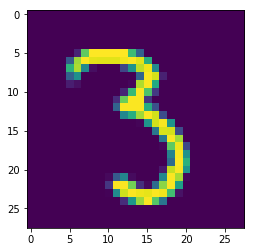

In [17]:
import matplotlib.pyplot as plt
plt.imshow(train_images[8888])

Having gone through the process of reading the image data, we can do this much more quickly with the labels. The [with](https://docs.python.org/3/reference/compound_stmts.html#with) statement is more commonly used to open file-like objects:

In [18]:
tmp_HR = urllib.request.urlopen("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz")
with open("tmp_MNIST_train_labels.gz", "w+b") as f:
    f.write(tmp_HR.read())
with gzip.open("tmp_MNIST_train_labels.gz", "rb") as f:
    bytes_TrainLabels = f.read()
train_labels = bytearray(bytes_TrainLabels[8:])

Did we get the labels right?

In [19]:
train_labels[8888]

3